# Homework 4 - Hard Coding

## 1. Hashing

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import random
import hyperloglog
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import collections
from collections import defaultdict
from collections import Counter
import pickle
import ast
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import seaborn as sns
from matplotlib import cm
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
import multiprocessing.dummy as mp 
import json

### References:

https://github.com/svpcom/hyperloglog

https://gist.github.com/miguno/f4882d0b40f6ef2368c9705a9a277793

https://www.youtube.com/watch?v=TG48mumSIaw&ab_channel=AnuradhaBhatia

https://www.youtube.com/watch?v=eV1haPUt0NU&ab_channel=GauravSen

### Imported hll

In [2]:
#counted with set()
reallen = 125000001 

In [23]:
#Counting by imported hll
starttime = time.time()
f = open('hash.txt', "r")
hll = hyperloglog.HyperLogLog(0.01)
for n in range(1,139000000):
    r = f.readline(n)
    hll.add(r)
endtime = time.time()
print ('Time:', round(int(endtime-starttime),0), ' seconds')
print('Error obtained with the imported hll is:',((reallen-len(hll))/len(hll))*100)

Time: 481  seconds
Error obtained with the imported hll is: 0.06426126807226587


In [24]:
len(hll)

124919726

### Created hll

In [4]:
def convert(string):
    integer = int(string,16)
    binary = format(((a*integer+b)%p)%m, '032b')
    return binary

def index(b):
    index = int(b[2])
    if b[0] == '1' and b[1] == '1':
        index += 6
    elif b[0] == '1' and b[1] == '0':
        index += 4
    elif b[0] == '0' and b[1] == '1':
        index += 2
    return index

def zerocount(b):
    i = 1
    while b[-i] == '0' and i<len(b):
        i+=1
    return i

In [20]:
def created_hll(file,nlines):
    f = open(file, "r")
    B = []
    bucket = [0]*nbucket
    for n in range(35,nlines):
        r = f.readline(n)
        binary = convert(r)
        indexes = index(binary[:3])
        zeros = zerocount(binary[3:])
        bucket[indexes] = max(bucket[indexes],zeros) 
    lens = cardinality(bucket,nbucket)
    return lens

In [21]:
def cardinality(bucket,nbucket):
    Z = 1/sum([2**(-b-1) for b in bucket])
    new = 0.7213/(1+1.079/(2**nbucket))
    err = new*(nbucket**2)*Z
    return err

In [22]:
p = 32
m = 2**p
nbucket = 8
prime = 139000003
a = np.random.randint(0,prime)
b = np.random.randint(0,prime)

In [33]:
starttime = time.time()
c_hll = created_hll('hash.txt',139000000)
endtime = time.time()

In [36]:
c_hll

13.134127415925379

In [37]:
print ('Time:', round(int(endtime-starttime),0), ' seconds')
print('Error obtained with the created hll is:', reallen/(abs((reallen-int(c_hll))/int(c_hll))*100 ))

Time: 416  seconds
Error obtained with the created hll is: 0.13000001352000132


## 2. Clustering

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Reviews.csv')

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

In [5]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
data['ProfileName'].fillna('',inplace=True)

In [10]:
data['Summary'].fillna('',inplace=True)

In [11]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [12]:
data['Date']=pd.to_datetime(data.Time,unit='s')

In [13]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13


In [14]:
data.Date

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Date, Length: 568454, dtype: datetime64[ns]

### Distribution of Scores

In [15]:
import matplotlib.pyplot as plt

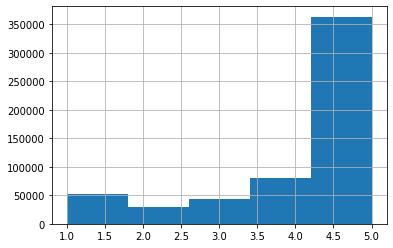

In [16]:
data.Score.hist(bins=5)

### Distribution of number of ratings per products

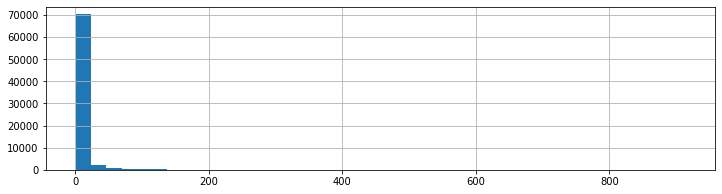

In [18]:
data.groupby(['ProductId']).Score.count().hist(bins=40,figsize=(12,3))

### Distribution of number of ratings with a score>2 per products

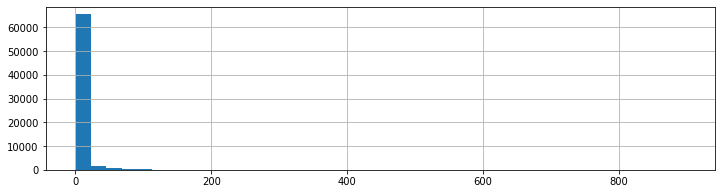

In [19]:
data[data['Score']>2].groupby(['ProductId']).Score.count().hist(bins=40,figsize=(12,3))

### Distribution of number of ratings per users

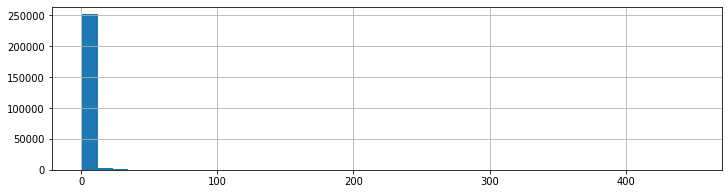

In [20]:
data.groupby(['UserId']).Score.count().hist(bins=40,figsize=(12,3))

### Distribution of average of ratings per users

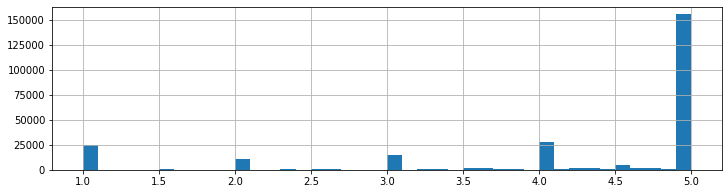

In [21]:
data.groupby(['UserId']).Score.mean().hist(bins=40,figsize=(12,3))

### Visualization/Analysis of data

### Heatmap of score vs months

In [47]:
import seaborn as sns

In [48]:
df=data.groupby([data.Date.dt.month,data.Score]).ProductId.count()
d={}
for month in range(1,13):
    d[month]=df[month].tolist()

In [49]:
d

{1: [4963, 2689, 3386, 6638, 32691],
 2: [4159, 2440, 3494, 6247, 29016],
 3: [4183, 2645, 3870, 7159, 30510],
 4: [3856, 2257, 3368, 6640, 28352],
 5: [4040, 2246, 3375, 6884, 29681],
 6: [4098, 2422, 3414, 6642, 27903],
 7: [4278, 2517, 3787, 7092, 30745],
 8: [4578, 2644, 3672, 7369, 32263],
 9: [5216, 2895, 4225, 7529, 35875],
 10: [5279, 2947, 4196, 7369, 35971],
 11: [3178, 1882, 2663, 5476, 23787],
 12: [4440, 2185, 3190, 5610, 26328]}

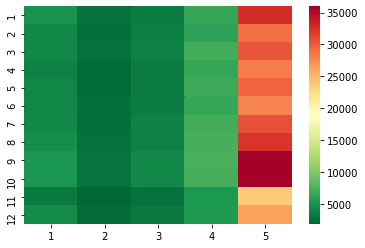

In [52]:
sns.heatmap(pd.DataFrame.from_dict(d,orient='index',columns=[1,2,3,4,5]),cmap='RdYlGn_r')

### Heatmap of day of week vs month

In [63]:
hist_dayofweek_month={}

In [64]:
for dayofweek in range(0,7):
    hist_dayofweek_month[dayofweek]=data[data.Date.dt.dayofweek==dayofweek].groupby(data.Date.dt.month).Score.count()

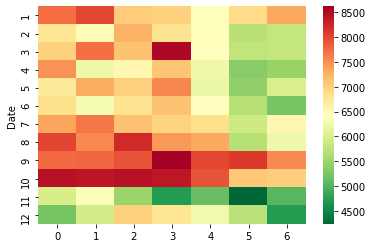

In [65]:
sns.heatmap(pd.DataFrame(hist_dayofweek_month),cmap='RdYlGn_r')

### Heatmap of day of week vs month (Average)

In [66]:
hist_dayofweek_month_mean={}

In [67]:
for dayofweek in range(0,7):
    hist_dayofweek_month_mean[dayofweek]=data[data.Date.dt.dayofweek==dayofweek].groupby(data.Date.dt.month).Score.mean()

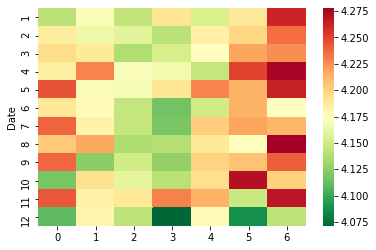

In [68]:
sns.heatmap(pd.DataFrame(hist_dayofweek_month_mean),cmap='RdYlGn_r')

### Look into the text

In [184]:
import nltk

In [185]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [186]:
lemmatizer=WordNetLemmatizer()

In [ ]:
stop_words=set(stopwords.words('english'))

In [190]:
def clean_text(text):
    words=word_tokenize(text)
    filtered_words=[]
    for word in words:
        if word.lower() not in stop_words and word.isalpha():
            filtered_words.append(lemmatizer.lemmatize(word.lower()))
    return filtered_words

In [ ]:
clean_text('Good Quality Dog Food')

In [ ]:
wordlist=data['Summary'].apply(lambda text: clean_text(text))

In [ ]:
data['subject_words']=wordlist

In [ ]:
data['subject_word_count']=data.subject_words.apply(lambda word_list: len(word_list))

In [ ]:
word_max=data.subject_word_count.max()

In [ ]:
word_max

In [ ]:
data[data.subject_word_count==25].subject_words

In [ ]:
data[data.subject_word_count==25].Summary

In [ ]:
flat_list=[item for sublist in wordlist for item in sublist]

In [ ]:
flat_series=pd.Series(flat_list).value_counts()[:30]

In [ ]:
for word in flat_series.value_counts().index:
    print (word)

### Clustering

In [31]:
from sklearn.cluster import KMeans 

In [32]:
model=KMeans(verbose=False)

In [33]:
slice=data.iloc[:,4:7]

In [35]:
model.fit(slice)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=False)

In [36]:
cluster=model.predict(slice)

In [37]:
data['cluster']=cluster

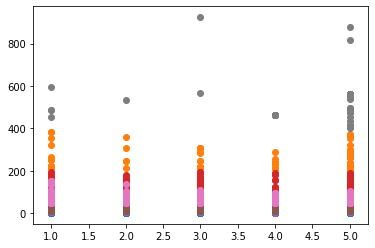

In [38]:
fig=plt.figure()
for cluster in range(10):
    plt.scatter(data[data.cluster==cluster].Score,data[data.cluster==cluster].HelpfulnessDenominator)
    
plt.show()    

In [193]:
from tqdm import tqdm
slice=data.iloc[:,4:7]

In [194]:
elbow={}
for k in tqdm(range(3,20)):
    elbow_model=KMeans(n_clusters=k)
    elbow_model.fit_predict(slice)
    elbow[k]=elbow_model.inertia_

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [05:29<00:00, 19.38s/it]


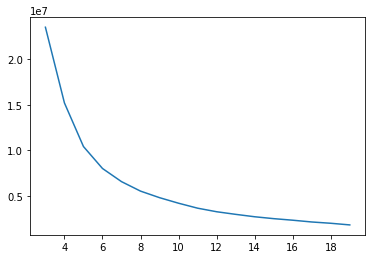

In [195]:
plt.plot(list(elbow.keys()),list(elbow.values()))

In [40]:
mode=KMeans(n_clusters=6)
slice=data.iloc[:,4:7]
model.fit(slice)
cluster_values=model.predict(slice)
data['cluster']=cluster_values

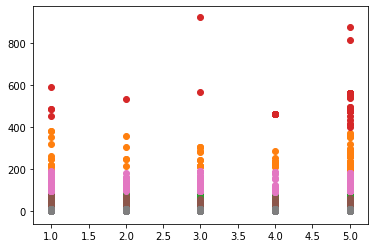

In [41]:
fig=plt.figure()
for cluster in range(10):
    plt.scatter(data[data.cluster==cluster].Score,data[data.cluster==cluster].HelpfulnessDenominator)
    
plt.show() 

### Adding Date features

In [133]:
data['month']=data.Date.dt.month

In [134]:
data['Dayofweek']=data.Date.dt.dayofweek

In [135]:
slice=data[['HelpfulnessNumerator','HelpfulnessDenominator','Score','month','Dayofweek']]

In [98]:
from tqdm import tqdm
elbow={}
for k in tqdm(range(3,20)):
    elbow_model=KMeans(n_clusters=k)
    elbow_model.fit_predict(slice)
    elbow[k]=elbow_model.inertia_

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [09:22<00:00, 33.06s/it]


Text(10, 20000000, 'Cluster size')

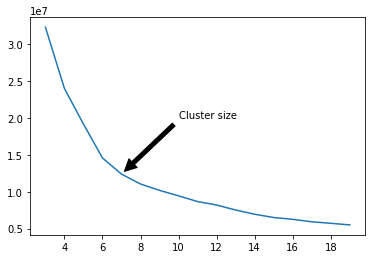

In [112]:
plt.plot(list(elbow.keys()),list(elbow.values()))
plt.annotate('Cluster size',xy=(7,elbow[7]),xytext=(10,20000000),arrowprops=dict(facecolor='black',shrink=0.05))

In [136]:
model=KMeans(7)

In [160]:
cluster=model.fit_predict(slice)

In [166]:
cluster

array([4, 0, 0, ..., 4, 4, 4])

In [167]:
data['cluster']=cluster

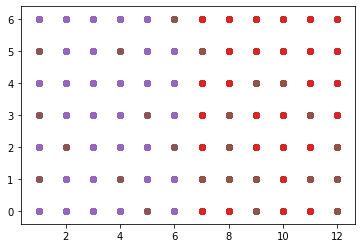

In [201]:
fig=plt.figure()
for cluster in range(6):
    plt.scatter(data[data.cluster==cluster].month,data[data.cluster==cluster].Dayofweek)
    
plt.show()

## 3. Algorithmic question

In [1]:
import numpy as np

def min_f(A):
    for i in range(len(A)):
        if i==0:
            m = A[i]
        else:
            if A[i]<m:
                m = A[i]
    return m

def max_f(A):
    for i in range(len(A)):
        if i==0:
            M = A[i]
        else:
            if A[i]>M:
                M = A[i]
    return M

def f_sort(A):
    if len(A)==1:
        return A
    freq = {}
    for i in range(len(A)):
        freq[A[i]] = []
    for i in range(len(A)):
        freq[A[i]] += [A[i]]
    s = min_f(A) 
    b = max_f(A)
    l = []
    for i in range(s, b):
        if set.intersection(set([i]), set(A)):
                l += freq[i]
    l += freq[b]
    return np.array(l)

We implemented the f_sort function which comprises also functions for min and max; this choice was made in order to make sure that the time complexity of each of the two functions is exactly $O(n)$, as seen during the lectures. Moreover, at the beginning of the algorithm, dictionary of numbers' frequency is initialised first with $T(n)=O(n)$, then called again with same $T(n)$.
<br>
Taking all of that into consideration, the overall time complexity of f_sort can be calculated as $T(n)=c1n+c2n+c3n+c4n+c5r+const$, which results, applying Big O notation (coefficients and constants removed), in $T(n)=O(n+r)$. Of course $n$ defines the length of the array in input, while $r$ is the distance between max and min of the array; time complexity of the intersection function is, on average, $O(min(O(1),O(n)))$ from Python documentation, in this case we intersect a single integer ($O(1)$) with the array.

In [3]:
# Example of implementation of f_sort on array A and larger random array B
A = np.array([2, 1, 5, 6, -1, 3, 0, 5, 9, 7], int)
print(f_sort(A), "\n")
B = np.random.randint(0, 500, 250)
print(B, "\n\n\n", f_sort(B))

[-1  0  1  2  3  5  5  6  7  9] 

[284  26 357 306  31 277 463 259 312 153 415 199 355 372 216 258 133 247
 154 183  43 389 394 128 124 106 442 399 212 303 119 465 434  71 214 108
 345 283 180 243  62 204 306 421 497 148  79 255 352  24  93   7  37 396
 394 308 229 134 382 339  51 102  54 176 204 147  12 172 144 447 356 272
 499  11 323 174 314  17 183 177 151 183 486 275 208 173 382 178 117 176
  61 453 205 384 124 178 496 138 457  83 161  28 441 448 440 176 111 283
 187 356 285 448 459 341 262  41 323 451 495 156 231  52   6 311 185 121
 296 281 344 173  56 405 278 255 492 484 121 498  10 405 141 423 236 371
 328 210  22  25 212  50 496 300 374 302 187 384  29 226 111 245 291  25
 375 476 489  85 388  32 432 119 439 238 494 250 298 442 130   5 485 258
 281 355   8 333   6 310 288 271 195  35 347  16 135 485 381 165 133 128
 383 496 495 233 444 371 298 193 336 373 389 106 205 102 170 444 437  28
 206  75  43 463 331  38 412  96 126 467 278 223  59  88 322 292  83 153
 353 332   9 245 

The algorithm proves efficient even with a large random array with 100000 integers with $r=10000$, being computed in five minutes.

In [21]:
C = np.random.randint(0, 10000, 100000)
print(f_sort(C)[-100:-1])

[9990 9990 9990 9990 9990 9990 9990 9990 9990 9990 9991 9991 9991 9991
 9991 9991 9991 9991 9991 9992 9992 9992 9992 9992 9992 9992 9992 9992
 9992 9992 9992 9993 9993 9993 9993 9993 9993 9993 9993 9993 9993 9994
 9994 9994 9994 9994 9994 9994 9994 9994 9994 9995 9995 9995 9995 9995
 9995 9995 9995 9995 9995 9996 9996 9996 9996 9996 9996 9996 9996 9996
 9996 9997 9997 9997 9997 9997 9997 9998 9998 9998 9998 9998 9998 9998
 9998 9998 9998 9998 9998 9999 9999 9999 9999 9999 9999 9999 9999 9999
 9999]
